# Twoscales
Example of macro illustrating how to superimpose two histograms
with different scales in the "same" pad.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:00 AM.</small></i>

In [1]:
%%cpp -d
#include "TCanvas.h"
#include "TStyle.h"
#include "TH1.h"
#include "TGaxis.h"
#include "TRandom.h"

In [2]:
TCanvas *c1 = new TCanvas("c1","hists with different scales",600,400);

Create/fill draw h1

In [3]:
gStyle->SetOptStat(kFALSE);
TH1F *h1 = new TH1F("h1","my histogram",100,-3,3);
Int_t i;
for (i=0;i<10000;i++) h1->Fill(gRandom->Gaus(0,1));
h1->Draw();
c1->Update();

Create hint1 filled with the bins integral of h1

In [4]:
TH1F *hint1 = new TH1F("hint1","h1 bins integral",100,-3,3);
Float_t sum = 0;
for (i=1;i<=100;i++) {
   sum += h1->GetBinContent(i);
   hint1->SetBinContent(i,sum);
}

Scale hint1 to the pad coordinates

In [5]:
Float_t rightmax = 1.1*hint1->GetMaximum();
Float_t scale = gPad->GetUymax()/rightmax;
hint1->SetLineColor(kRed);
hint1->Scale(scale);
hint1->Draw("same");

Draw an axis on the right side

In [6]:
TGaxis *axis = new TGaxis(gPad->GetUxmax(),gPad->GetUymin(),
      gPad->GetUxmax(), gPad->GetUymax(),0,rightmax,510,"+L");
axis->SetLineColor(kRed);
axis->SetLabelColor(kRed);
axis->Draw();

Draw all canvases 

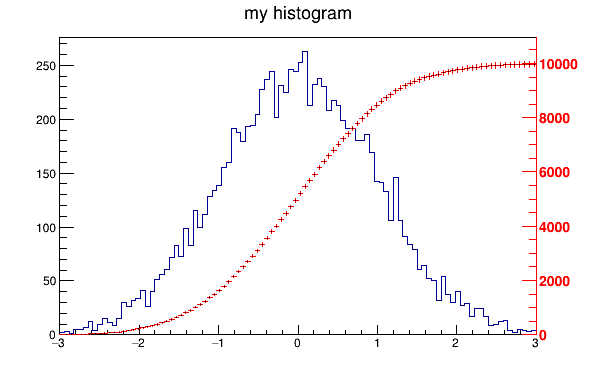

In [7]:
gROOT->GetListOfCanvases()->Draw()